# Q-Learning

![Bellman_1](https://user-images.githubusercontent.com/44867923/141013004-bde1b971-fcdc-445e-bf08-9bc89311891c.jpg)
![Bellman_2](https://user-images.githubusercontent.com/44867923/141012134-09ff0d88-4ce9-43af-8b04-d535cf24d897.jpg)

In [13]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Create Environment: Stochastic Frozen-Lake

In [14]:
env = gym.make("FrozenLake-v1", is_slippery=True)

In [15]:
ALPHA = 0.1
GAMMA = 0.9
EPISODES = 10000
EPSILON = 0.9
DELTA_EPSILON = EPSILON / EPISODES
MIN_EPSILON = 0.1

### Create Q Table: Value of every action in every state

In [16]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Agent: play the environment and update the Q table

In [17]:
for ep in range(EPISODES):
    obs = env.reset()
    done = False
    EPSILON = max(EPSILON - DELTA_EPSILON, MIN_EPSILON)
    while not done:
        
        # Select Action
        if EPSILON < np.random.rand():
            action = env.action_space.sample() # Random action: Exploration
        else:
            action = np.argmax(Q[obs])  # Best action: Exploitation

        next_obs, reward, done, _ = env.step(action)
        
        # Update Q value for this action in this observation
        actual_obs_action_value = Q[obs, action]
        best_next_obs_action_value = reward + GAMMA * Q[next_obs].max() - actual_obs_action_value
        Q[obs, action] = actual_obs_action_value + ALPHA * best_next_obs_action_value
        
        obs = next_obs

### Plot Q* Table: highest action value for every state

<AxesSubplot:>

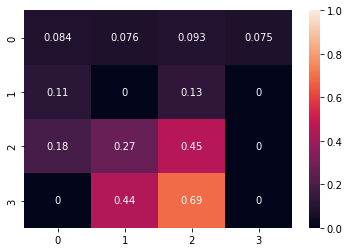

In [18]:
sns.heatmap(data=Q.max(axis=1).reshape(4,4), annot=True, vmax=1)

### Plot Q* Table: action with highest value for every state

<AxesSubplot:>

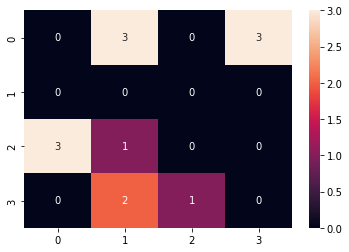

In [19]:
sns.heatmap(data=np.argmax(Q, axis=1).reshape(4,4), annot=True)

### Plot Q Table: state value for every action

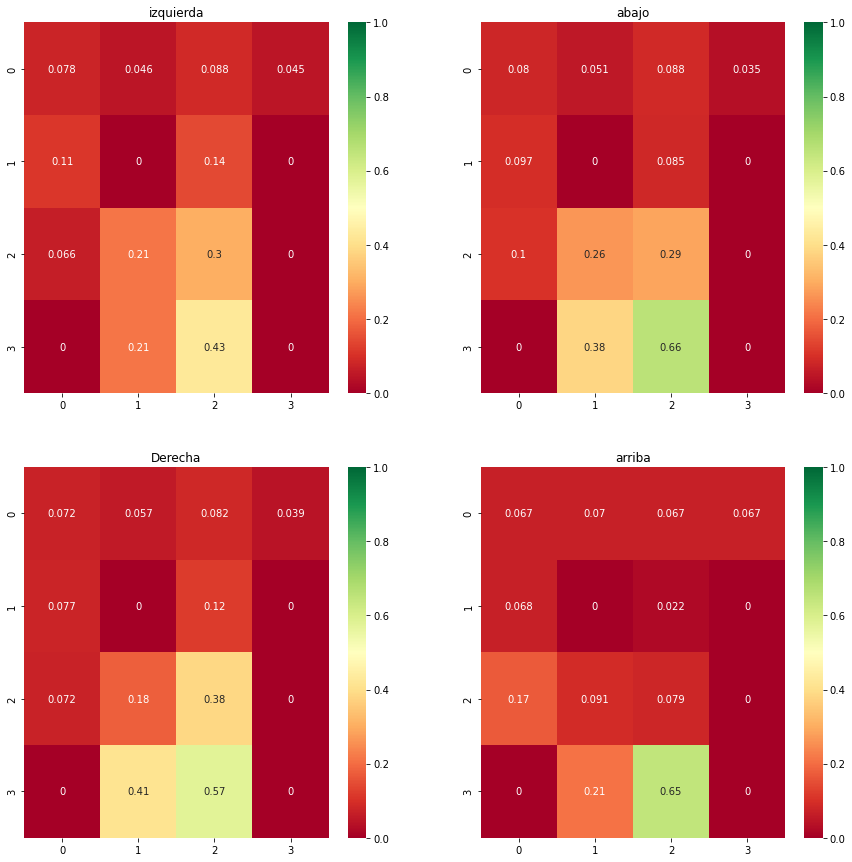

In [7]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

plot = ax[0,0]
plot.set_title("izquierda")
values = Q.T[0].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[0,1]
plot.set_title("abajo")
values = Q.T[1].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[1,0]
plot.set_title("Derecha")
values = Q.T[2].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[1,1]
plot.set_title("arriba")
values = Q.T[3].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

_ = plt.plot()